<h1> Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.shape

(1000, 8)

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<h1> Exploratory Data Analysis

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#Unique Value
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'gender' has '2' unique values
Feature 'race/ethnicity' has '5' unique values
Feature 'parental level of education' has '6' unique values
Feature 'lunch' has '2' unique values
Feature 'test preparation course' has '2' unique values
Feature 'math score' has '81' unique values
Feature 'reading score' has '72' unique values
Feature 'writing score' has '77' unique values


In [8]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [9]:
#Dropping "launch" cause not related with student performance
data=data.drop(['lunch'], axis=1)

In [10]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [11]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [13]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

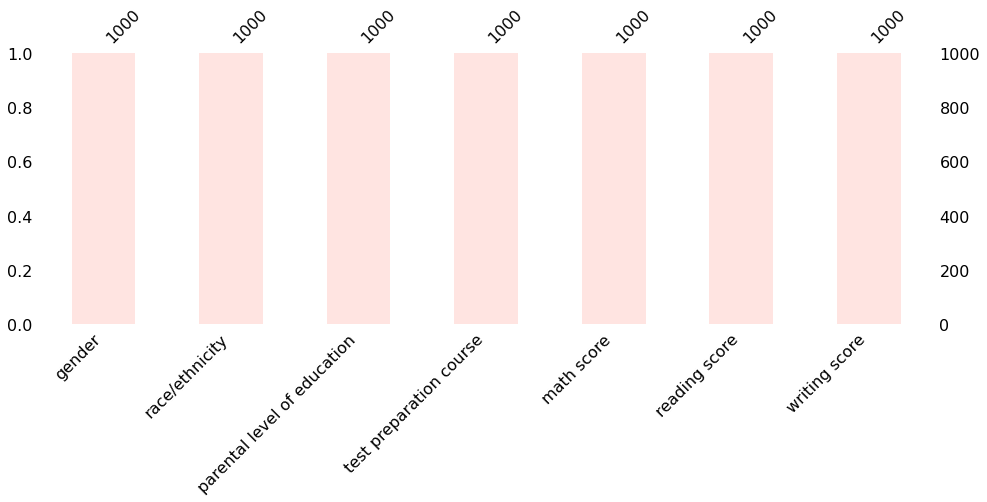

In [14]:
msno.bar(data, figsize = (16,5),color = "#FFE4E1")
plt.show()

There is no gasp in this data

In [15]:
#Result of each person
data['result']=(data['math score']+data['reading score']+data['writing score'])
data.result.value_counts()
data

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,result
0,female,group B,bachelor's degree,none,72,72,74,218
1,female,group C,some college,completed,69,90,88,247
2,female,group B,master's degree,none,90,95,93,278
3,male,group A,associate's degree,none,47,57,44,148
4,male,group C,some college,none,76,78,75,229
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,282
996,male,group C,high school,none,62,55,55,172
997,female,group C,high school,completed,59,71,65,195
998,female,group D,some college,completed,68,78,77,223


In [16]:
#Average of each person
data['average_score']=(data['math score']+data['reading score']+data['writing score'])//3
data.average_score.value_counts()
data

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,result,average_score
0,female,group B,bachelor's degree,none,72,72,74,218,72
1,female,group C,some college,completed,69,90,88,247,82
2,female,group B,master's degree,none,90,95,93,278,92
3,male,group A,associate's degree,none,47,57,44,148,49
4,male,group C,some college,none,76,78,75,229,76
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,282,94
996,male,group C,high school,none,62,55,55,172,57
997,female,group C,high school,completed,59,71,65,195,65
998,female,group D,some college,completed,68,78,77,223,74


In [17]:
#Grade of Results
def Grade(average_score):
    if average_score >= 95:
        return 'O'
    
    if average_score >= 81:
        return 'A'
    
    if average_score >= 71:
        return 'B'
    
    if average_score >= 61:
        return 'C'
    
    if average_score >= 51:
        return 'D'
    
    if average_score >= 41:
        return 'E'
    
    return 'F'

In [18]:
data['Grade']=data.apply(lambda x: Grade(x['average_score']),axis=1)
data

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,result,average_score,Grade
0,female,group B,bachelor's degree,none,72,72,74,218,72,B
1,female,group C,some college,completed,69,90,88,247,82,A
2,female,group B,master's degree,none,90,95,93,278,92,A
3,male,group A,associate's degree,none,47,57,44,148,49,E
4,male,group C,some college,none,76,78,75,229,76,B
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,282,94,A
996,male,group C,high school,none,62,55,55,172,57,D
997,female,group C,high school,completed,59,71,65,195,65,C
998,female,group D,some college,completed,68,78,77,223,74,B


<h4> Analysis based on Gender

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


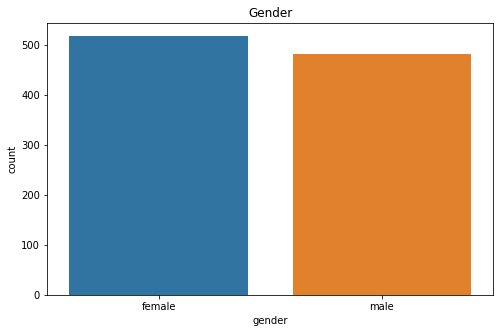

In [19]:
#Amount of Gender
plt.figure(figsize=(8,5))
sns.countplot(data['gender'])
plt.title('Gender')
plt.show()

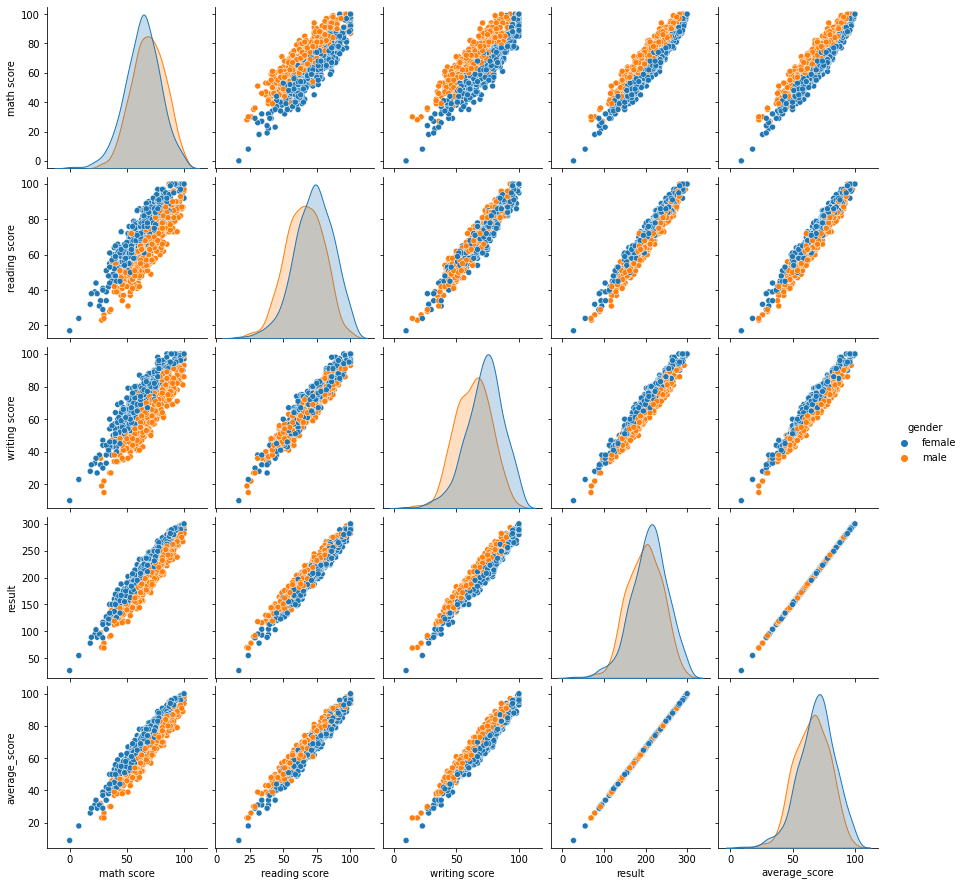

In [20]:
sns.pairplot(data,hue='gender')

Female(518, 10)


None

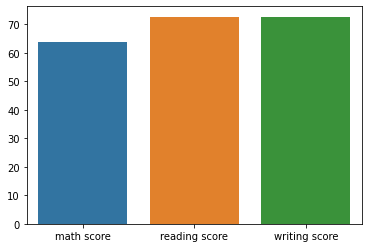

In [21]:
#Average Score of Female
female = data.loc[data["gender"].str.contains("female")]
display(print(f"Female{female.shape}"))
sns.barplot(data = female.groupby(["gender"]) [["math score","reading score","writing score"]].mean())
plt.show()

Male(482, 10)


None

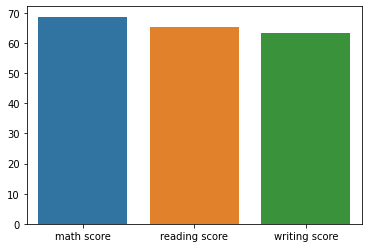

In [22]:
#Average Score of Male
male = data.loc[~data["gender"].str.contains("fe")]
display(print(f"Male{male.shape}"))
sns.barplot(data = male.groupby(["gender"]) [["math score","reading score","writing score"]].mean())
plt.show()

<Figure size 720x360 with 0 Axes>

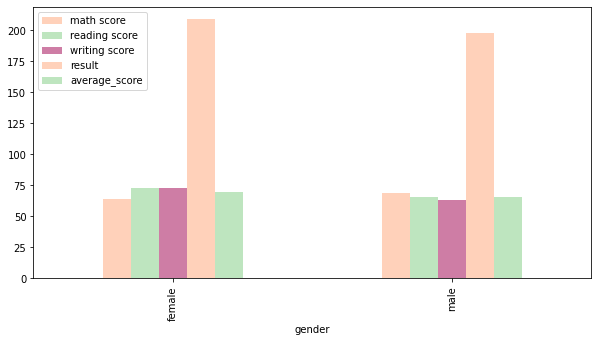

In [23]:
#Gender does better for each subjects
plt.figure(figsize=(10,5))
group = data.groupby(["gender"]).mean().plot(kind = "bar",color = ["#ffd1ba","#BEE5BF","#CE7DA5"],figsize = (10,5))
plt.show()

<AxesSubplot:ylabel='writing score'>

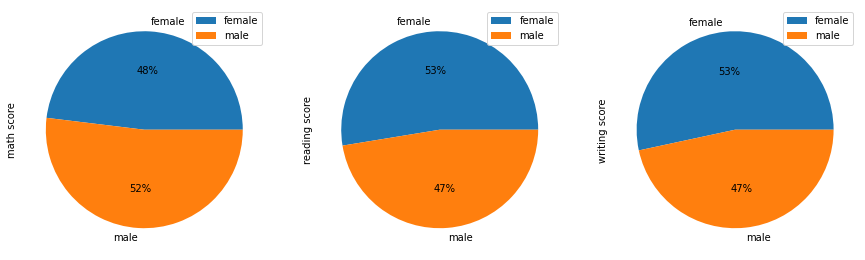

In [24]:
#Amount of each gender in each subjects
fig,axes = plt.subplots(1,3,figsize=(15,5))
data.groupby("gender").mean().plot(ax = axes[0],kind = "pie",y = "math score",autopct = "%1.0f%%")
data.groupby("gender").mean().plot(ax = axes[1],kind = "pie",y = "reading score",autopct = "%1.0f%%")
data.groupby("gender").mean().plot(ax = axes[2],kind = "pie",y = "writing score",autopct = "%1.0f%%")

<h4> Analysis based on Race/Ethnicity

<AxesSubplot:ylabel='race/ethnicity'>

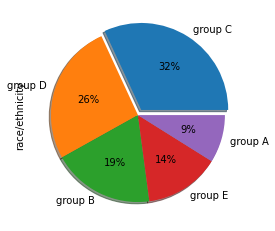

In [25]:
#Amount of Group
data["race/ethnicity"].value_counts().plot(kind = "pie",autopct = "%1.0f%%",shadow = True,explode = [0.07,0.0,0.0,0.0,0.0])

<Figure size 1080x360 with 0 Axes>

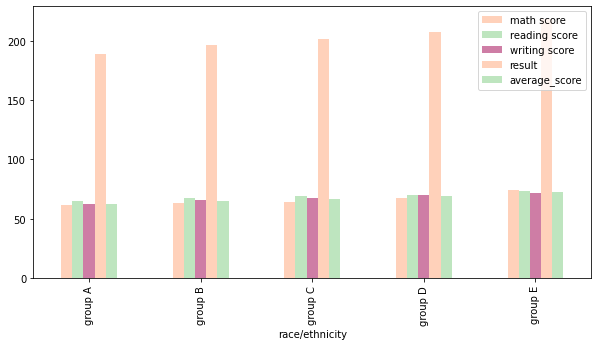

In [26]:
#Average score of groups
plt.figure(figsize=(15,5))
group = data.groupby(["race/ethnicity"]).mean().plot(kind = "bar",color = ["#ffd1ba","#BEE5BF","#CE7DA5"],figsize = (10,5))
plt.show()

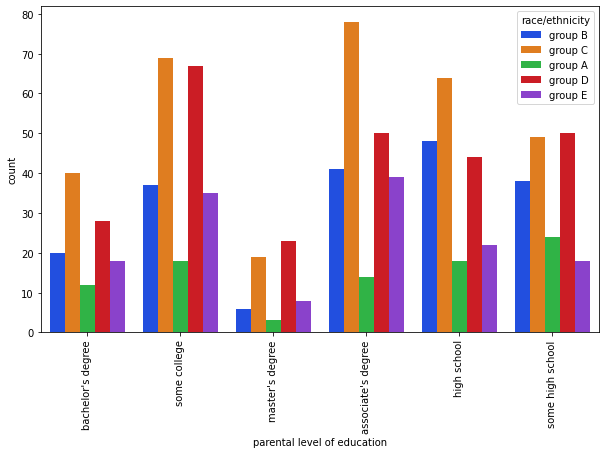

In [27]:
#Level education for Race/Ethnicity
sns.set_palette('bright')
plt.figure(figsize=(10,6))
sns.countplot(x='parental level of education', hue='race/ethnicity', data=data)
plt.xticks(rotation=90)
plt.show()

<h4> Analysis based on Parental level education

<AxesSubplot:ylabel='parental level of education'>

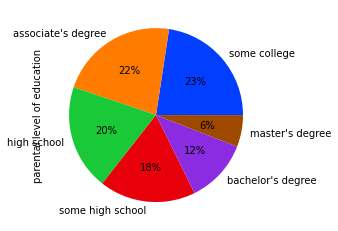

In [28]:
#Amount of level parental
data["parental level of education"].value_counts().plot(kind = "pie",autopct = "%1.0f%%")

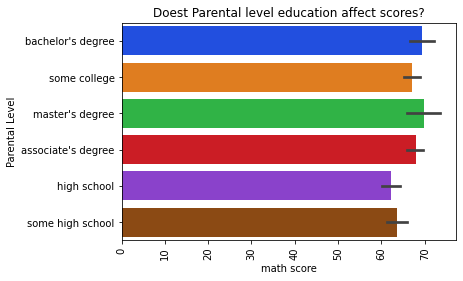

In [29]:
sns.barplot(y='parental level of education',x='math score',data=data)
plt.title('Doest Parental level education affect scores?')
plt.xlabel('math score')
plt.ylabel('Parental Level')
plt.xticks(rotation=90)
plt.show()

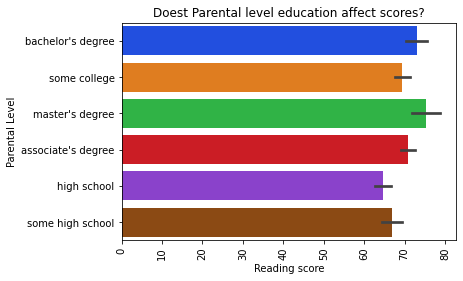

In [30]:
sns.barplot(y='parental level of education',x='reading score',data=data)
plt.title('Doest Parental level education affect scores?')
plt.xlabel('Reading score')
plt.ylabel('Parental Level')
plt.xticks(rotation=90)
plt.show()

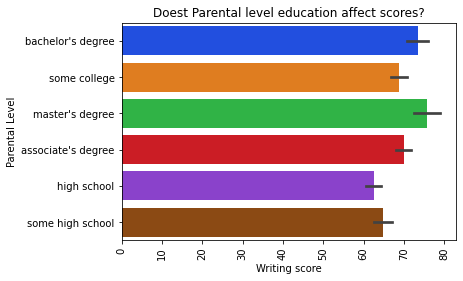

In [31]:
sns.barplot(y='parental level of education',x='writing score',data=data)
plt.title('Doest Parental level education affect scores?')
plt.xlabel('Writing score')
plt.ylabel('Parental Level')
plt.xticks(rotation=90)
plt.show()

<h4> Analysis based on Preparation

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test preparation course', ylabel='count'>

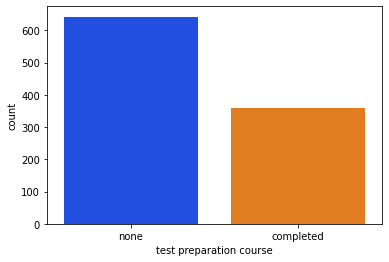

In [32]:
sns.countplot(data['test preparation course']) 

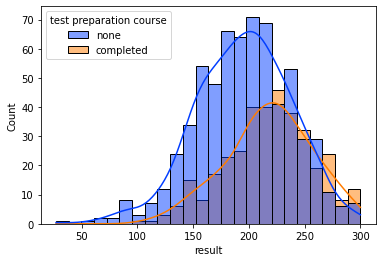

In [33]:
sns.histplot(data = data,x = "result",hue = "test preparation course", kde = True)
plt.show()